In [37]:
import ast
import matplotlib.pyplot as plt
import math
import numpy as np
import random

In [38]:
def read_file(name):
    """
    Input a text file with a dictionnary like data format and output this file as a dictionnary

    Parameters
    ----------
    name : str
        file path

    """
    file = open(name, "r")

    contents = file.read()
    dictionary = ast.literal_eval(contents)

    file.close()
    return dictionary
    
data = read_file('datasets/test-4.txt')
#To load another graph, you can replace the line above with
# data = read_file('datasets/test-1.txt')
# data = read_file('datasets/test-2.txt')
# data = read_file('datasets/test-3.txt')
# data = read_file('datasets/test-4.txt')

In [39]:
def get_point_coord(data):
    """
    Input a dictionnary with nodes, extract the valSues of each nodes (x, y and id) and output them into a list format such as : 
    [(x1,y1),(x2,Y2)...(xn,yn)]

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """
    coord_list = []
    node_list = data.get('nodes')
    for node in node_list:
        coord_list.append((node.get('x'),node.get('y')))
    return coord_list

def get_edges_coord(data):


    """
    Input a dictionnary with nodes and edges, extract for each edges : the id of the starting point (is matched with the coordinate of the point), 
    the id of the ending point (is matched with the coordinate of the point) and the coordinates of the bends and output it in this format : 

    edge_list = [[[x_11, x_12, ..., x_1n],[y_11, y_12, ..., y_1n]], ... ,[[x_n1, x_n2, ..., x_nn],[y_n1, y_n2, ..., y_nn]]]

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """
    
    node_x_cord_list = []
    node_y_cord_list = []
    node_list = data.get('nodes')
    for node in node_list:
        node_x_cord_list.append(node.get('x'))
        node_y_cord_list.append(node.get('y'))
    
    edge_list = []
    edge_description = data.get('edges')

    for edge in edge_description:
        cord_list = []
        start = edge.get('source')
        stop  = edge.get('target')
        bend_list = edge.get('bends')

        if bend_list != None:
            cord_list.append([node_x_cord_list[start],node_y_cord_list[start]])
            for bend in bend_list:
                cord_list.append([bend.get('x'),bend.get('y')])

            cord_list.append([node_x_cord_list[stop],node_y_cord_list[stop]])

            edge_list.append(cord_list)
        else:
            cord_list.append([node_x_cord_list[start],node_y_cord_list[start]])
            cord_list.append([node_x_cord_list[stop],node_y_cord_list[stop]])
            edge_list.append(cord_list)

    return edge_list


In [40]:
def show_graph2(node_list, edge_list,size):
    
    """
    Output the graph using matplotlib and input the data. 
    each nodes is display as a point using the plt.plot(x,y,o) method (the o is used to indicate that we want to display a point)
    each edges is displayed by drawing line between its adjacents points using the method plt.plot(x,y)
    
    The methods get_point_coord and get_edges_coord defined before are used to.

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """
    
   
    plt.rcParams["figure.figsize"] = [10, 10]
    plt.xlim([-size,size])
    plt.ylim([-size,size])
    x_point_list = []
    y_point_list = []
    for i in range(len(node_list)):
        x_point_list.append(node_list[i][0])
        y_point_list.append(node_list[i][1])
    

    plt.plot(x_point_list, y_point_list, 'o')

    for i, j in zip(x_point_list, y_point_list):
        #plt.text(i, j+0.5, '({}, {})'.format(i, j))
        pass

    for edge in edge_list:
        x_coord = []
        y_coord = []
        for point in edge:
            x_coord.append(point[0])
            y_coord.append(point[1])
        plt.plot(x_coord, y_coord)
    plt.show()

node_list =get_point_coord(data)
edge_list = get_edges_coord(data)

In [41]:
def check_int_coordinates(data) :
    
    """
    
    Check if the x and y coordinates of the nodes are of type integer. Print 'valid' or 'not valid' as a result
    we use the isinstance() builtin method which return the type of the value passed as argument

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """
    node_list = get_point_coord(data)
    x_point_list = []
    y_point_list = []
    for i in range(len(node_list)):
        x_point_list.append(node_list[i][0])
        y_point_list.append(node_list[i][1])
    
    valid = True

    for value in x_point_list:   
        if isinstance(value, int) == False:
            valid = False
    
    for value in y_point_list:   
        if isinstance(value, int) == False:
            valid = False
    
    if valid:
        print('the coordinates are valid ! ')
    else:
        print('the coordinates are not valid ! ')

    return valid

check_int_coordinates(data)

the coordinates are valid ! 


True

In [42]:
def number_of_bend(data, max_bend_wanted) :
    
    """
    
    Return the higher number of bend there is for the edges. 
    In practice, we get the edge list from the rawn data. For each edge, we iterate though the bends and keep track of the longest one. 
    The method return the highest number of bend admists the edges. 

    Parameters
    ----------
    data : str
        the dictionnary containing the nodes informations

    """

    max_bend = 0
    edge_description = data.get('edges')

    for edge in edge_description:
        bend_list = edge.get('bends')

        bend_actual = 0

        if bend_list != None:
            
            for bend in bend_list:
                bend_actual +=1
                
            if bend_actual > max_bend:
                max_bend = bend_actual

    print('there is ',max_bend, 'bend(s) and you wanted a maximum of', max_bend_wanted, 'bend.')
    
    return max_bend < max_bend_wanted

number_of_bend(data,5)
    

there is  2 bend(s) and you wanted a maximum of 5 bend.


True

In [43]:

def get_orientation(point1, point2, point3):
    
    """
    
    Return the orientation of the triangle (point1, point2, point3) by computing the sign of  (y2 - y1)*(x3 - x2) - (y3 - y2)*(x2 - x1). This is used
    later for the computation of intersecting edges.

    Parameters
    ----------
    point1 : tuple(int,int)
        x and y coordinates of the 1st point
    point2 : tuple(int,int)
        x and y coordinates of the 2nd point
     point3 : tuple(int,int)
        x and y coordinates of the 3th point

    """
    
    x1,y1 = point1
    x2,y2 = point2
    x3,y3 = point3

    result = (y2 - y1)*(x3 - x2) - (y3 - y2)*(x2 - x1)

    if point1 == point2 or point1 == point3:
        result =0

    if result < 0:
        return 'counterclockwise'
    elif result > 0 : 
        return 'clockwise'

def segment_intersection(segment1, segment2):
    
    """
    
    Compute if there is an intersection between segment1 and segment2 using the get_orientation function above. Return true if there is, false if there is not

    Parameters
    ----------
    
    segment1 : tuple(tuple,tuple)
        the two extermities of the first segment
    segment2 : tuple(tuple, tuple)
        the two extermities of the second segment

    """
    
    point1, point2 = segment1
    point3, point4 = segment2

    if get_orientation(point1, point2, point3) != get_orientation(point1, point2, point4):
        if get_orientation(point3, point4, point1) != get_orientation(point3, point4, point2):
            return True
        else: 
            return False
    else:
        return False


def edges_crossing(edge_list):
    
    """
    
    Compute if there is an intersection between two segments of the  input graph. 
    
    create a segment list which contains all the bends of all the edges than use a double for loop to check each segments against the others
    
    ----------
    
    segment1 : tuple(tuple,tuple)
        the two extermities of the first segment
    segment2 : tuple(tuple, tuple)
        the two extermities of the second segment

    """
    
    segment_list = []

    for edge in edge_list:
        for i in range(len(edge)-1):
            segment_list.append([edge[i],edge[i+1]])
    segment_list

    
    result = False
    for segment1 in segment_list:
        for segment2 in segment_list:
            point1, point2 = segment1
            point3, point4 = segment2

            if (point1 == point3) or point1 == point4 or point2 == point3 or point2 == point4:
                result = False
            else:
                if segment_intersection(segment1, segment2) == True:
                    print('there is an intersection between',segment1, 'and',segment2)
                    result = True
                    return result
    if result == False:
        print("there is no intersection")
        return result

edges_crossing(edge_list)

there is no intersection


False

In [44]:

def euclidian_distance(point1, point2):
    """
    return the euclidian distance between two points 
    
    ----------

    point1 : tuple(x1,y1)
        and x1, y1 the x and y coordinates of point1

    point2 : tuple(x2,y2)
        and x2, y2 the x and y coordinates of point1

    """
    x1,y1 = point1
    x2, y2 = point2
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

def compute_edge_length(edge_list):
    """
    return a list of length (number of edges) with the length of all edges

    The method compute the length of all the bends of each edges and add them together 
    
    ----------

    data : str
        the dictionnary containing the nodes informations
        
    """
    edge_length_list = []

    for edge in edge_list:
        edge_length = 0
        for i in range(len(edge)-1):
            point1 = edge[i][0],edge[i][1]
            point2 = edge[i+1][0], edge[i+1][1]
            edge_length += euclidian_distance(point1, point2)
        edge_length_list.append(edge_length)
    return edge_length_list

def compute_ratio(edge_list,point_list):
    """
    Compute the planar edge length ration which is the minimum edge-length ratio of any planar straight-line drawing of the graph.
    In pratcice, we use the prevous method compute_edge_length and compute the ratio using the smallest and largest value of the list
    
    ----------

    data : str
        the dictionnary containing the nodes informations
        
    """
    edge_length = compute_edge_length(edge_list)

    minima = min(edge_length)
    maxima = max(edge_length)
    r = maxima/minima

    return r


def find_neighbour(node_list, edge_list):
    """
    return the neighbour of each nodes : 
    [
        [x,y],[x,y]... neighbour of node 1
        [x,y],[x,y]... neighbour of node 2
        ...
    ]
    
    ----------

    node_list : array
        the node list
    
    edge_list : array
        the edge list
    """
    
    vertex_list = []
    neighbour_list = []

    for i in range(len(node_list)):
        vertex_list.append([node_list[i][0],node_list[i][1]])
    

    for vertex in vertex_list:
        neighbour = []
        for edge in edge_list:
            first_point = edge[0]
            last_point = edge[-1]

            if vertex == first_point:
                neighbour.append(last_point)
            if vertex == last_point:
                neighbour.append(first_point)
        neighbour_list.append(neighbour)
    
    return neighbour_list

def initialisation():
    """
    initiate the node_list and edge list to their initial state. We use 'global' to access within the function
    """
    global node_list
    global edge_list
    node_list = get_point_coord(data)
    edge_list = get_edges_coord(data)

def sup_bends():
    """
    Delete all the bends from the graph since we will not need them for tutte embedding.
    We use "global edge_list" to modify directly the edge list 
            
    """
    global edge_list
    new_edge_list = []
    for bend in edge_list:
        new_edge_list.append([bend[0],bend[-1]])
        
    edge_list = new_edge_list

    
def compute_centroid(polygon):
    """
    Compute the centroid of the polygon as argument
    ----------
    polygon: array
        the polygon for which we want to calculate the centroid
    """
    x_cords = []
    y_cords = []
    for point in polygon:
        x_cords.append(point[0])
        y_cords.append(point[1])
    x_centroid = 0
    y_centroid = 0
    for x in x_cords:
        x_centroid += int(x)

    for y in y_cords:
        y_centroid +=int(y)
    
    if len(polygon):
        return (x_centroid/len(polygon), y_centroid/len(polygon))
    else : 
        return 0


def adj_matrix(node_list, edge_list):
    
    """
    Return the adjacency matrix which is computed from the edge_list
    ----------

    node_list : array
        the node list
    
    edge_list : array
        the edge list
            
    """
    neighbour = find_neighbour(node_list, edge_list)
    neighbour_list = []
    
    for i,node in enumerate(node_list):
        row = []
        for point in neighbour[i]:
            id_of_point = node_list.index((point[0],point[1]))
            row.append(id_of_point)
        
        neighbour_list.append(row)
    
   
    adj_matrixx = np.zeros((len(node_list),len(node_list)))
    
    for i, nh in enumerate(neighbour_list):
        for id in nh:
            adj_matrixx[i,id] = 1     
            adj_matrixx[id,i] = 1     
                                
    
    
    return adj_matrixx


def find_cycle(matrix):
    
    """
    This method find a cycle in the graph using the adjacency matrix. 
    It generates a random set of points and test if it is a cycle. It repeats the process until one is found.
    It start with a set of 3 points, if after 500 iterations no cycle has been found, it will increment to 4 points... until 30 points
    
        ----------

    matrix: np.array
        the adjacency matrix
            
    """
    
    l = len(matrix)
    cycle =  []
    is_cycle = False
    count = 0
    k = 3
    
    while is_cycle == False:
        unique = False
        count+=1
        if count%500 == 0:
            k+=1
        if k >30 or k == len(node_list):
            print('there is no cycle in this graph')
            return 
        while unique == False:
            cycle = []
            for i in range(k):
                cycle.append(random.randint(0,l-1))
            if len(cycle) == len(set(cycle)):
                unique = True
        count2 = 0    
        for i in range(len(cycle)-1):
            if matrix[cycle[i],cycle[i+1]] == 1:
                count2+=1
        if matrix[cycle[0]][cycle[-1]] == 1:
            count2 +=1
        
        if count2 == len(cycle):
            is_cycle = True
            return cycle
        else:
            is_cycle = False
            unique = False
    return cycle

def DFS(matrix, cycle):
    
    """
    A deep first search algorithm, it will search though the subset of the graph minus the cycle. If it is able to find all the points
    it means that the graph is still connected
    
        ----------

    matrix: np.array
        the adjacency matrix
    cycle: array
        the cycle of points we found using the find_cycle method
            
    """
    for i,point_id in enumerate(cycle):
        matrix = np.delete(matrix,point_id-i,axis=0)
        matrix = np.delete(matrix,point_id-i,axis=1)
    
    visited = np.zeros(len(matrix))
    ans = []
    stack = []

    def dfs(n):
        if visited[n]:
            return
        else:
            visited[n] = 1
            num = 0
            stack.append(n)
            for relation in matrix[n]:
                if relation != 0:
                    dfs(num)
                num += 1
        ans.append(n)
        stack.pop() 

    src_node = 0
    dfs(src_node)
    return ans
      
def move_cycle (cycle):
        
    """
    Move the chosen cycle outside of the graph to form a convex polygon. We apply a vector based rotation. 
    ----------

    cycle: array
        the cycle of points we found using the find_cycle method
            
    """
    
    global node_list
    global edge_list
    
    cycle_coord= [node_list[point]for point in cycle]
    
    max_x = 0
    max_y = 0
    

    for point in node_list:

        if point[0]>max_x:
            max_x = point[0]
        if point[0]>max_x:
            max_x = point[0]
        if point[1] >max_y:
            max_y = point[1]
            
    node_list2 = []
    for i,point in enumerate(node_list):
        if i not in cycle:
            node_list2.append(point)
        
    
    y_avg = compute_centroid(node_list2)[0]
    x_avg = compute_centroid(node_list2)[1]
    
    max_x, max_y =max_x, max_y

    angle_entre_points = math.pi*2/len(cycle)
    
    #point 1 : 
    angle = 0
    for id in cycle:
        #current_x, current_y = max_x + x_avg, max_y + y_avg
        current_x, current_y = max_x, max_y
        new_x = round(current_x*math.cos(angle)-current_y*math.sin(angle)+x_avg)
        new_y = round(current_x*math.sin(angle)+current_y*math.cos(angle)+y_avg)
        angle +=angle_entre_points
        
        for i, line in enumerate(edge_list):
            for j, point in enumerate(line):
                if point == [node_list[id][0],node_list[id][1]]:
                    edge_list[i][j] =  [new_x,new_y]
        
        #change the node list
        node_list[id] = ((new_x,new_y))

def force_directed_method(ith, cycle,size):
    """
    The force directed method. For each point outside of the outer cycle, we compute its centroid relatively to its neighbour and then move it at this location
    ----------

    ith: int
        the number of iteration (1 means that we will move all the points once...)
    cycle: array
        the outer cycle
            
    """
    global node_list
    global edge_list
    
    point_to_move = []
    for i in range(ith):
        for j in range(len(node_list)):
            point_to_move.append(j)
    
   
    for id in point_to_move:
        #we check that the point is not part of the cycle
        if id not in cycle:
            neighbour_list = find_neighbour(node_list,edge_list)
            current_neighbour = neighbour_list[id]
            x_to_go, y_to_go = compute_centroid(current_neighbour)
            x_to_go, y_to_go = round(x_to_go),round(y_to_go)
            
            if(x_to_go, y_to_go)not in node_list:
                #modification of the edges
                for i, line in enumerate(edge_list):
                    for j, point in enumerate(line):
                        if point == [node_list[id][0],node_list[id][1]]:
                            edge_list[i][j] =  [x_to_go,y_to_go]
                
                #modification of the point
                node_list[id] = ((x_to_go,y_to_go))
                #show_graph2(node_list, edge_list,size)
            else:
                pass
        else:
            pass
    return 

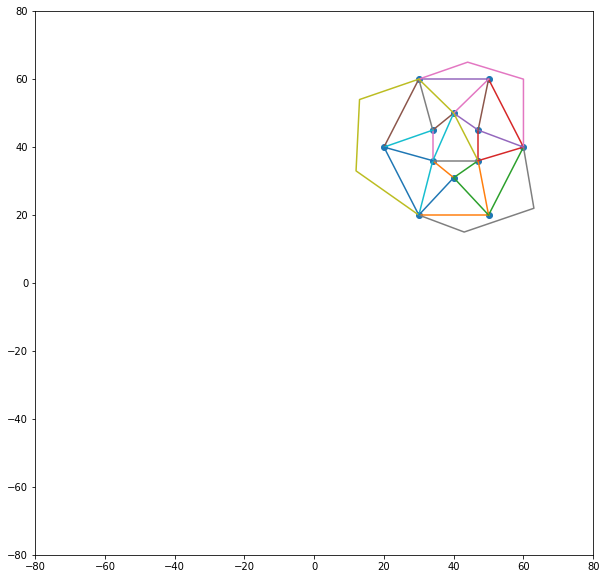

In [45]:
initialisation() #initialize the value of the graph
s = 80 #the size for the display
show_graph2(node_list, edge_list,s) #display the graph

The next cell will display the graph after the cycle is moved around it

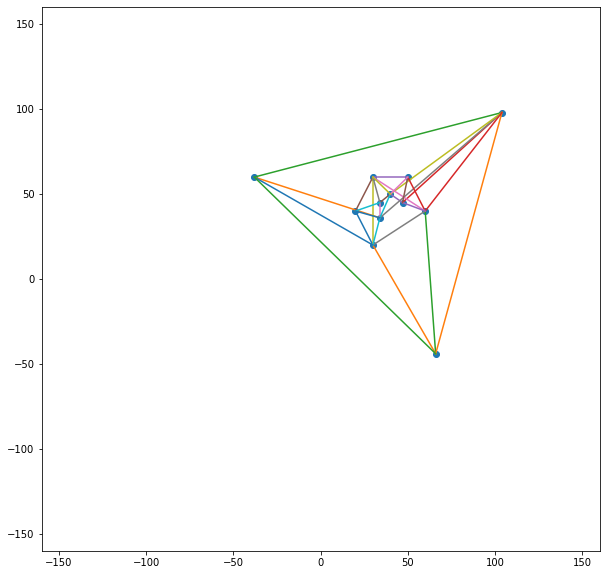

A valid cycle is :  [(47, 36), (40, 31), (50, 20)] [1, 0, 7]


In [46]:
sup_bends() #delete the bends
cycle_is_valid = False

#this loop test if the subset of the graph minus the cycle is still connected
while cycle_is_valid == False:
    matrix = adj_matrix(node_list,edge_list)   
    cycle = find_cycle(matrix)
    a = DFS(matrix, cycle)
    if len(a) == len(node_list)- len(cycle):
        cycle_is_valid = True

cycle_coord= [node_list[point]for point in cycle]
move_cycle(cycle) #move the cycle on an outter convex polygon
show_graph2(node_list,edge_list,2*s) #show the graph with the outter cycle
print("A valid cycle is : ",cycle_coord, cycle)

The next cell will launch the force directed method. The first parameter (here 50) is the number of iteration

In [47]:
force_directed_method(50,cycle,s) #The force directed method for 50 iterations

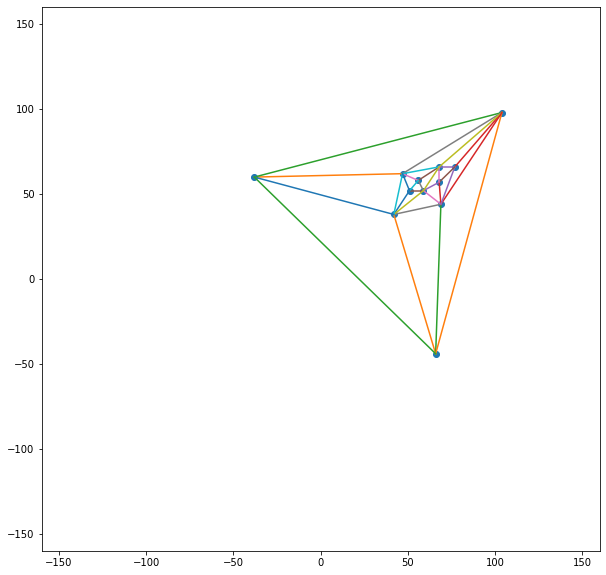

In [48]:
show_graph2(node_list, edge_list, 2*s) #show the resulting graph